# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
from sklearn.model_selection import train_test_split
from PIL import Image
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

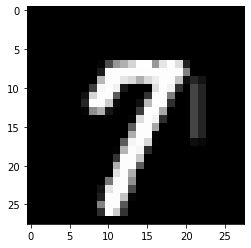

In [5]:
def plot_img(df):
    plt.imshow(Image.fromarray(df.reshape(28,28)))


plot_img(X_train[0])

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

#### E1.3.1: Naive Bayes

In [6]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [7]:
nb_pred = clf.predict(X_train)

In [8]:
accuracy_score(y_train, nb_pred)

0.5623333333333334

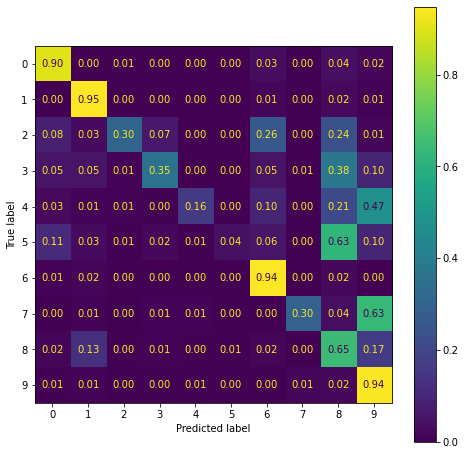

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(clf, X_train, y_train, normalize='true', values_format='.2f', ax=ax)

#### E1.3.2: Simple Linear Model

In [165]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf_svc = make_pipeline(StandardScaler(), SGDClassifier(loss='log'))
clf_svc.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [166]:
accuracy_score(y_train, clf_svc.predict(X_train))

0.9084

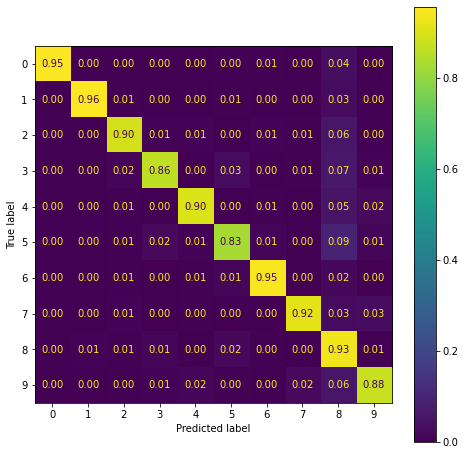

In [167]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(clf_svc, X_train, y_train, normalize='true', values_format='.2f', ax=ax)

#### E1.3.3: Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=7, random_state=0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=0)

In [23]:
accuracy_score(y_train, clf_rf.predict(X_train))

0.9146333333333333

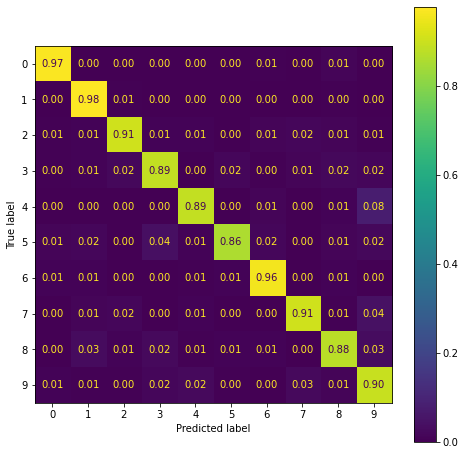

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(clf_rf, X_train, y_train, normalize='true', values_format='.2f', ax=ax)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [136]:
print('NB Accuracy:', accuracy_score(y_test, clf.predict(X_test)))
print('SGD Accuracy:', accuracy_score(y_test, clf_svc.predict(X_test)))
print('RF Accuracy:', accuracy_score(y_test, clf_rf.predict(X_test)))

NB Accuracy: 0.5539
SGD Accuracy: 0.863
RF Accuracy: 0.9045


In [137]:
from sklearn.metrics import f1_score
print('NB F-Measure:', f1_score(y_test, clf.predict(X_test), average='weighted'))
print('SGD F-Measure:', f1_score(y_test, clf_svc.predict(X_test), average='weighted'))
print('RF F-Measure:', f1_score(y_test, clf_rf.predict(X_test), average='weighted'))

NB F-Measure: 0.5138183860152811
SGD F-Measure: 0.8635298776056892
RF F-Measure: 0.9045528049994606


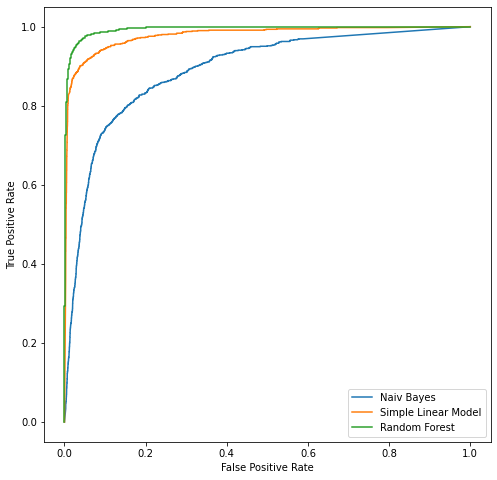

In [169]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

fig, ax = plt.subplots(figsize=(8, 8))

scores = clf.predict_proba(X_test)[:,5]
fpr0, tpr0, _ = metrics.roc_curve(y_test, scores, pos_label='5')
metrics.RocCurveDisplay(fpr=fpr0, tpr=tpr0, estimator_name='Naiv Bayes').plot(ax)

scores = clf_svc.predict_proba(X_test)[:,5]
fpr1, tpr1, _ = metrics.roc_curve(y_test, scores, pos_label='5')
metrics.RocCurveDisplay(fpr=fpr1, tpr=tpr1, estimator_name='Simple Linear Model').plot(ax)

scores = clf_rf.predict_proba(X_test)[:,5]
fpr2, tpr2, _ = metrics.roc_curve(y_test, scores, pos_label='5')
metrics.RocCurveDisplay(fpr=fpr2, tpr=tpr2, estimator_name='Random Forest').plot(ax)